In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data"
df = pd.read_csv(data_url)

print(df.head())
print(df.info())
print(df.describe())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
df['Jitter:DDP'].fillna(df['Jitter:DDP'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

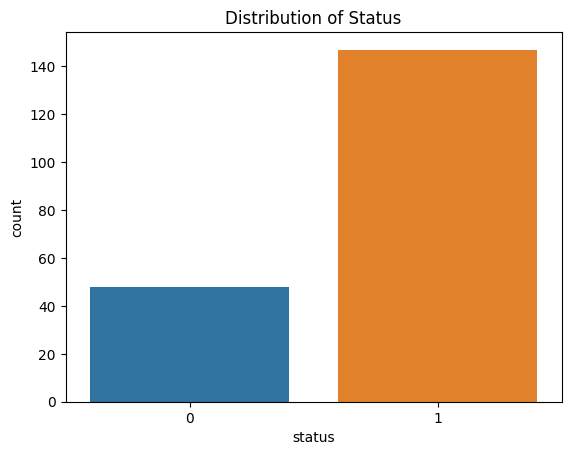

In [ ]:
sns.countplot(data=df, x='status')
plt.title('Distribution of Status')
plt.show()

<ipython-input-4-69c7805e2ce2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


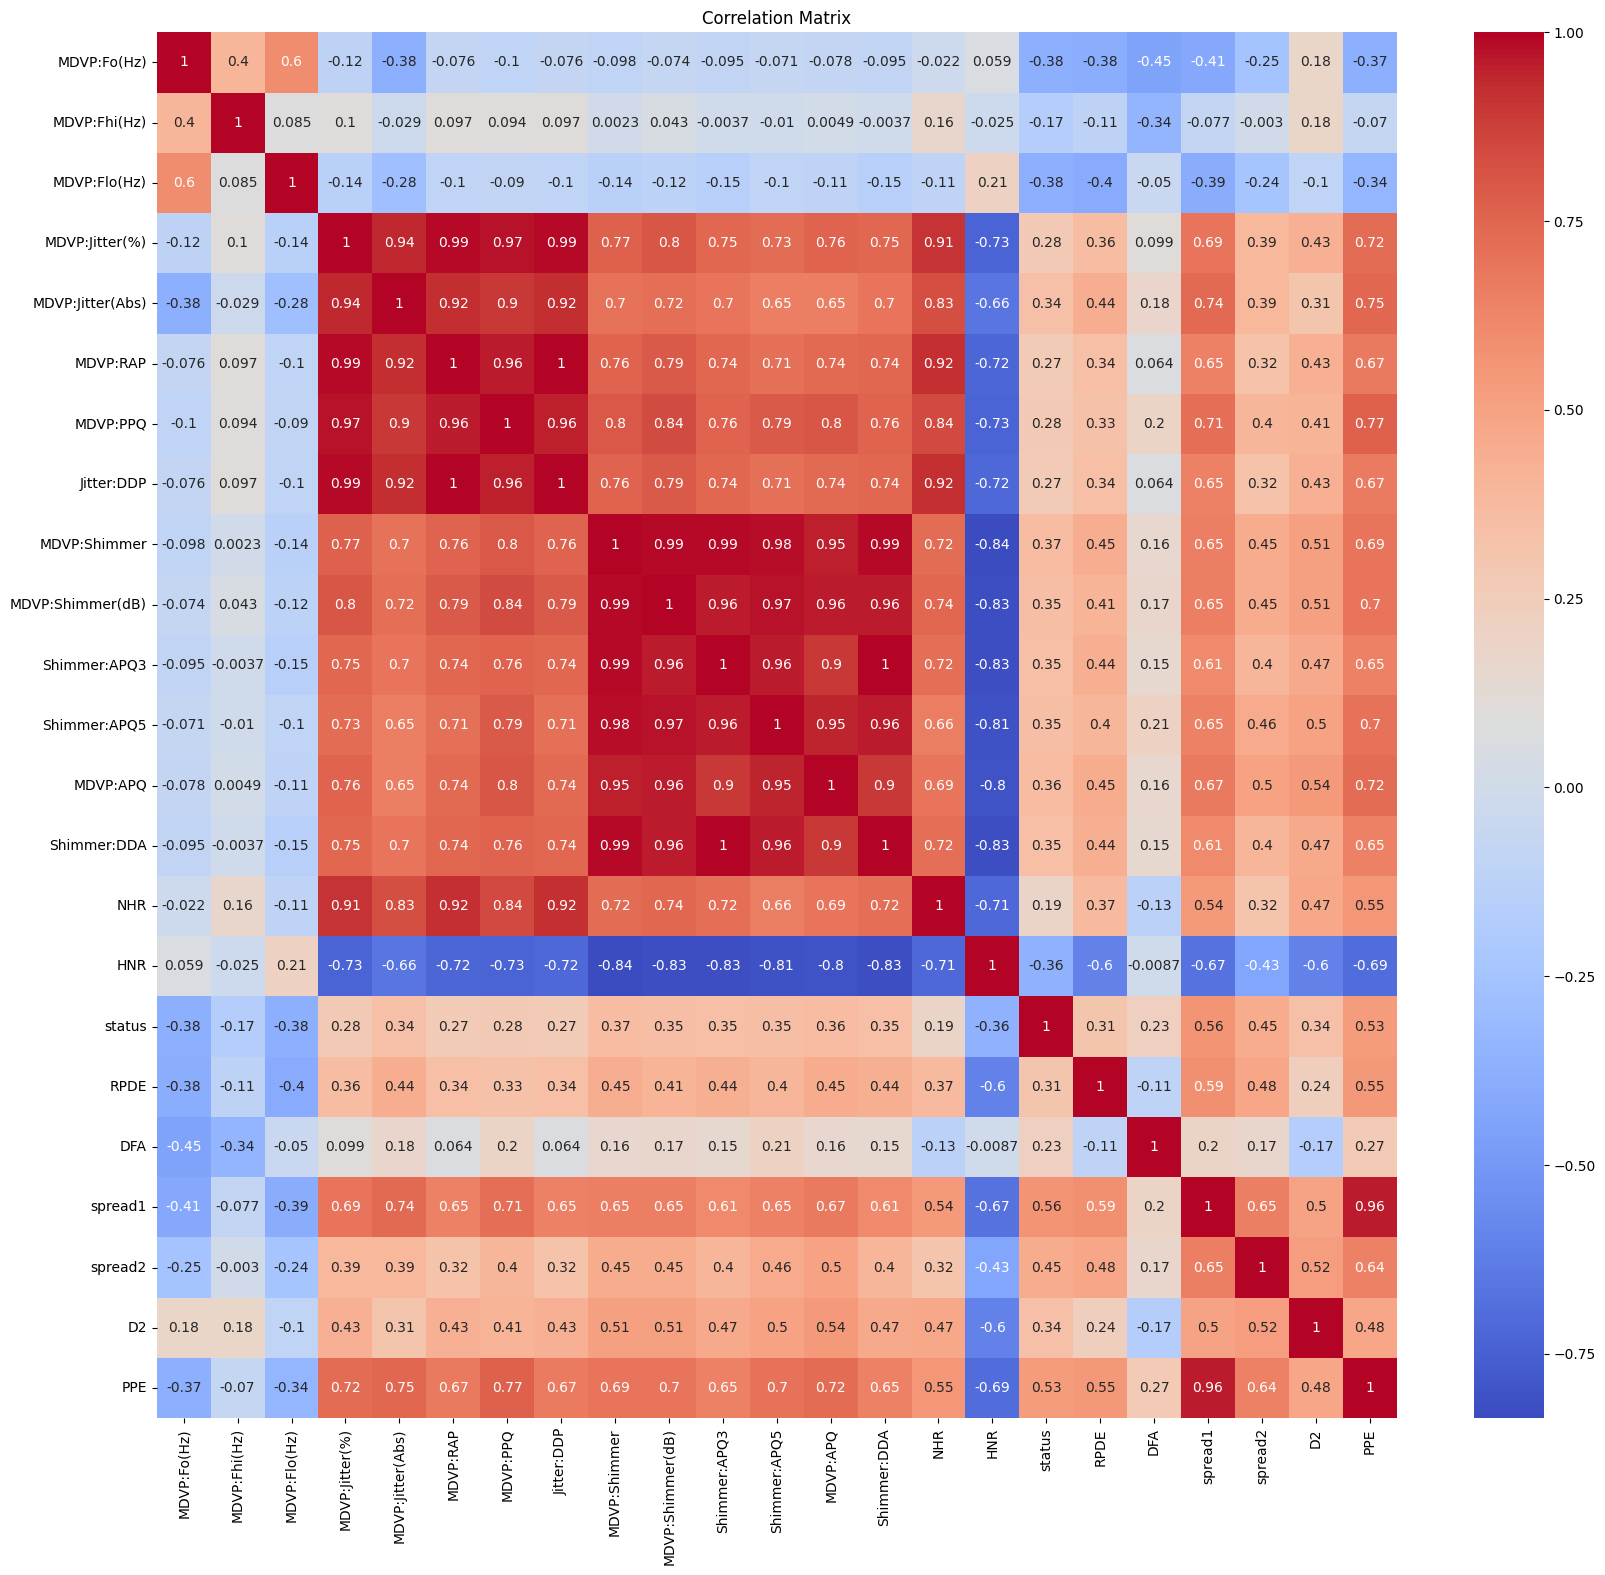

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = df[['spread1', 'spread2', 'PPE']]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier()
}

param_grid = {
    'RandomForestClassifier': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
    'SVC': {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [5, 10, 15]}
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}, Accuracy: {accuracy:.2f}")

RandomForestClassifier - Best Parameters: {'max_depth': 10, 'n_estimators': 200}, Accuracy: 0.79
SVC - Best Parameters: {'C': 10, 'kernel': 'linear'}, Accuracy: 0.90
KNeighborsClassifier - Best Parameters: {'n_neighbors': 5}, Accuracy: 0.87
Decision Tree - Best Parameters: {'max_depth': 15}, Accuracy: 0.85


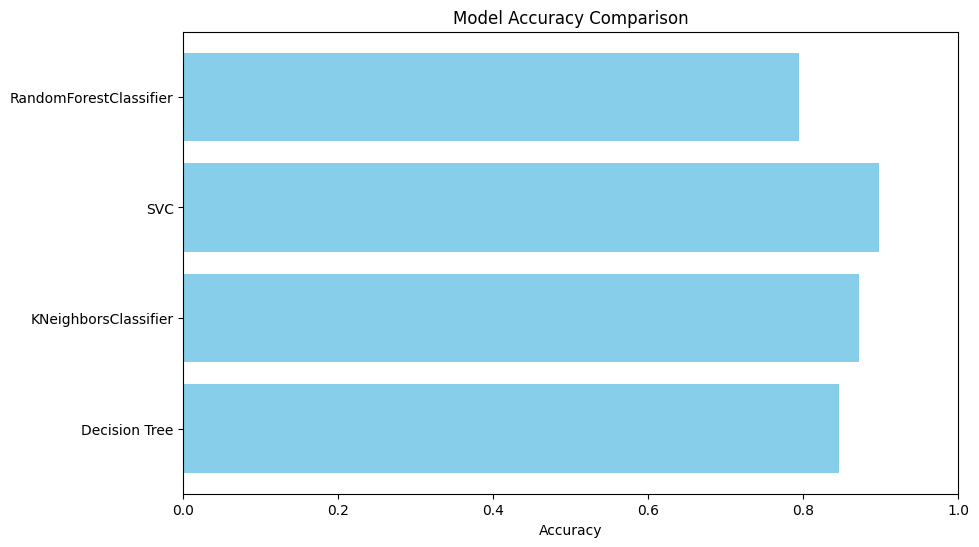

In [ ]:
model_names = list(best_models.keys())
accuracies = [accuracy_score(y_test, best_models[model_name].predict(X_test)) for model_name in model_names]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1.0)
plt.gca().invert_yaxis()
plt.show()